<a href="https://colab.research.google.com/github/marilena238/datastories_for_emme/blob/main/Marilena%20HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import spacy

In [5]:
!python -m spacy download el_core_news_sm

2023-06-10 16:23:12.197660: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 121.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [46]:
start_page=2
end_page=4
start_url = 'https://www.newsbomb.gr/politikh?page='

test_url = start_url + str(start_page)

In [8]:
response = requests.get(test_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [9]:
articles_list = doc.find('div', {'class': 'p10'}).find_all('div')

In [10]:
articles_list[0]

<div class="cd card-item md-flat t-22 md-t-20 has-img ctype-story" id="item-1436123">
<figure class="item-media">
<a href="/politikh/story/1436123/79-xronia-apo-ti-sfagi-tou-distomou-nikos-dendias-gia-tis-germanikes-apozimioseis">
<picture>
<source media="(min-width: 768px)" srcset="https://nb.bbend.net/media/news/2023/06/10/1436123/snapshot/dendias.jpg"/>
<source media="(min-width: 0px)" srcset="https://nb.bbend.net/media/news/2023/06/10/1436123/figure/dendias.jpg"/>
<img alt="79 χρόνια από τη Σφαγή του Διστόμου - Νίκος Δένδιας για τις γερμανικές αποζημιώσεις" class="item-image" height="80" src="https://nb.bbend.net/media/news/2023/06/10/1436123/snapshot/dendias.jpg" width="132"/>
</picture>
</a>
</figure>
<div class="item-info">
<a class="item-category" href="/politikh">ΠΟΛΙΤΙΚΗ</a>
<div class="item-details">
<h3 class="item-title">
<a href="/politikh/story/1436123/79-xronia-apo-ti-sfagi-tou-distomou-nikos-dendias-gia-tis-germanikes-apozimioseis">
							79 χρόνια από τη Σφαγή του Δι

In [11]:
print(articles_list[0].prettify())    

<div class="cd card-item md-flat t-22 md-t-20 has-img ctype-story" id="item-1436123">
 <figure class="item-media">
  <a href="/politikh/story/1436123/79-xronia-apo-ti-sfagi-tou-distomou-nikos-dendias-gia-tis-germanikes-apozimioseis">
   <picture>
    <source media="(min-width: 768px)" srcset="https://nb.bbend.net/media/news/2023/06/10/1436123/snapshot/dendias.jpg"/>
    <source media="(min-width: 0px)" srcset="https://nb.bbend.net/media/news/2023/06/10/1436123/figure/dendias.jpg"/>
    <img alt="79 χρόνια από τη Σφαγή του Διστόμου - Νίκος Δένδιας για τις γερμανικές αποζημιώσεις" class="item-image" height="80" src="https://nb.bbend.net/media/news/2023/06/10/1436123/snapshot/dendias.jpg" width="132"/>
   </picture>
  </a>
 </figure>
 <div class="item-info">
  <a class="item-category" href="/politikh">
   ΠΟΛΙΤΙΚΗ
  </a>
  <div class="item-details">
   <h3 class="item-title">
    <a href="/politikh/story/1436123/79-xronia-apo-ti-sfagi-tou-distomou-nikos-dendias-gia-tis-germanikes-apozimio

In [12]:
link = articles_list[0].find('a', {'class': ''})['href']

print(link)

/politikh/story/1436123/79-xronia-apo-ti-sfagi-tou-distomou-nikos-dendias-gia-tis-germanikes-apozimioseis


In [13]:
main_url = 'https://www.newsbomb.gr'
article_link = main_url + link
print(article_link) 

https://www.newsbomb.gr/politikh/story/1436123/79-xronia-apo-ti-sfagi-tou-distomou-nikos-dendias-gia-tis-germanikes-apozimioseis


In [14]:
news_list = []

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo teaser_articles_list***
  articles_list = doc.find('div', {'class': 'p10'}).find_all('div', {'class': 'cd card-item md-flat t-22 md-t-20 has-img ctype-story'})


  for teaser in articles_list:
      story_dict = {}
      try:
        
        #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στο link, ΜΕΤΑ το teaser
        link = teaser.find('a', {'class': ''})['href'] 
        

        if link.startswith("http"):
          story_dict['url'] = link
        else:
          story_dict['url'] = main_url + link
      except:
        story_dict['url'] = ''
        pass
      news_list.append(story_dict)
  time.sleep(1)

In [15]:
news_bomb_df = pd.DataFrame(news_list)
news_bomb_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv',index=False)
news_bomb_df

url
0   https://www.newsbomb.gr/politikh/story/1436123...
1   https://www.newsbomb.gr/politikh/story/1436091...
2   https://www.newsbomb.gr/politikh/story/1436088...
3   https://www.newsbomb.gr/politikh/story/1436024...
4   https://www.newsbomb.gr/politikh/story/1436016...
..                                                ...
70  https://www.newsbomb.gr/politikh/story/1434937...
71  https://www.newsbomb.gr/politikh/story/1434930...
72  https://www.newsbomb.gr/politikh/story/1434924...
73  https://www.newsbomb.gr/politikh/story/1434898...
74  https://www.newsbomb.gr/politikh/story/1434890...

[75 rows x 1 columns]

In [21]:
article_url = 'https://www.newsbomb.gr/politikh/story/1435982/aleksis-tsipras-i-omilia-sti-larisa'

In [22]:
response = requests.get(article_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [23]:
article = doc.find('article')

In [24]:
section = doc.find('a', {'class': 'main-category'}).text
section

'ΠΟΛΙΤΙΚΗ'

In [25]:
title = article.find('h1').text
title

'Αλέξης Τσίπρας: Στις εκλογές ψηφίζουμε για τη ζωή μας'

In [26]:
date = article.find('time')['datetime']
date

'2023-06-09T22:43:19+03:00'

In [27]:
author = article.find('p', {'class', "main-author story-author"}).span.text
author

'Newsbomb'

In [28]:
paragraphs = article.find_all('p')
paragraphs

[<p class="main-author story-author">
 <span class="author-name">Newsbomb</span>
 </p>,
 <p>Ο πρόεδρος του ΣΥΡΙΖΑ, <strong><a href="https://www.newsbomb.gr/tag/alexhs-tsipras">Αλέξης Τσίπρας</a></strong>, έδωσε σύνθημα αντεπίθεσης στις δεύτερες εκλογές εξαπολύοντας νέα επίθεση στη Νέα Δημοκρατία την οποία κατηγόρησε για κρυφή ατζέντα στην υγεία και σε άλλους τομείς.</p>,
 <p>«<em>Αυτή τη φορά ψηφίζουμε για τη ζωή μας γιατί αυτή κρίνεται</em>», τόνισε ο <strong><a href="https://www.newsbomb.gr/politikh/story/1436027/aleksis-tsipras-anakoinose-desmi-metron-gia-tous-agrotes-apo-to-kileler">Αλέξης Τσίπρας</a></strong> από ομιλία του στη Λάρισα, υπογραμμίζοντας ότι «<em>ο ΣΥΡΙΖΑ ήρθε για να μείνει, θα είναι εδώ δίπλα στους αγώνες και τις αγωνίες του ελληνικού λαού</em>».</p>,
 <p>«<em>Είμαστε και θα είμαστε μαζί σας μέχρι να σβήσει ο ήλιος, θα είμαστε για πάντα μαζί στις επάλξεις, γιατί ‘επιτρέπεται να πέσεις, αλλά επιβάλλεται να σηκωθείς' και είμαστε όρθιοι</em>», τόνισε, λέγοντας σε «<em>

In [29]:
p_texts_list = []                      # δημιουργία κενής λίστας για να αποθηκεύσουμε το text κάθε παραγράφου
paragraphs = article.find_all('p')     # λίστα με όλες τις παραγράφους
for p in paragraphs:                   # για κάθε μια από τις παραγράφους στη λίστα
  p_texts_list.append(p.text)          # πάρε το .text και πρόσθεσέ το στη λίστα με τα texts των παραγράφων
full_text = ' '.join(p_texts_list)     # συνένωση των texts των παραγράφων
full_text = "".join(full_text.splitlines())
full_text

"Newsbomb Ο πρόεδρος του ΣΥΡΙΖΑ, Αλέξης Τσίπρας, έδωσε σύνθημα αντεπίθεσης στις δεύτερες εκλογές εξαπολύοντας νέα επίθεση στη Νέα Δημοκρατία την οποία κατηγόρησε για κρυφή ατζέντα στην υγεία και σε άλλους τομείς. «Αυτή τη φορά ψηφίζουμε για τη ζωή μας γιατί αυτή κρίνεται», τόνισε ο Αλέξης Τσίπρας από ομιλία του στη Λάρισα, υπογραμμίζοντας ότι «ο ΣΥΡΙΖΑ ήρθε για να μείνει, θα είναι εδώ δίπλα στους αγώνες και τις αγωνίες του ελληνικού λαού». «Είμαστε και θα είμαστε μαζί σας μέχρι να σβήσει ο ήλιος, θα είμαστε για πάντα μαζί στις επάλξεις, γιατί ‘επιτρέπεται να πέσεις, αλλά επιβάλλεται να σηκωθείς' και είμαστε όρθιοι», τόνισε, λέγοντας σε «όσους τρέφουν φρούδες ελπίδες ότι ο ΣΥΡΙΖΑ είναι μια φωτοβολίδα» ότι «ο ΣΥΡΙΖΑ είναι το ώριμο τέκνο της ανάγκης της κοινωνίας και ήρθε για να στηρίξει τα λαϊκά στρώματα, τους μισθωτούς, τους μικρομεσαίους, τους ανθρώπους του μόχθου και της δημιουργίας, τους παραγωγούς, τους ανθρώπους του πολιτισμού». Ο πρόεδρος του ΣΥΡΙΖΑ ΠΣ είπε ότι την προηγούμενη περ

In [30]:
news_bomb_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv',index=False)
news_bomb_df

url
0   https://www.newsbomb.gr/politikh/story/1436123...
1   https://www.newsbomb.gr/politikh/story/1436091...
2   https://www.newsbomb.gr/politikh/story/1436088...
3   https://www.newsbomb.gr/politikh/story/1436024...
4   https://www.newsbomb.gr/politikh/story/1436016...
..                                                ...
70  https://www.newsbomb.gr/politikh/story/1434937...
71  https://www.newsbomb.gr/politikh/story/1434930...
72  https://www.newsbomb.gr/politikh/story/1434924...
73  https://www.newsbomb.gr/politikh/story/1434898...
74  https://www.newsbomb.gr/politikh/story/1434890...

[75 rows x 1 columns]

In [31]:
news_bomb_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv')
news_bomb_df.dropna(inplace=True)
news_bomb_df



url
0   https://www.newsbomb.gr/politikh/story/1436123...
1   https://www.newsbomb.gr/politikh/story/1436091...
2   https://www.newsbomb.gr/politikh/story/1436088...
3   https://www.newsbomb.gr/politikh/story/1436024...
4   https://www.newsbomb.gr/politikh/story/1436016...
..                                                ...
70  https://www.newsbomb.gr/politikh/story/1434937...
71  https://www.newsbomb.gr/politikh/story/1434930...
72  https://www.newsbomb.gr/politikh/story/1434924...
73  https://www.newsbomb.gr/politikh/story/1434898...
74  https://www.newsbomb.gr/politikh/story/1434890...

[75 rows x 1 columns]

In [32]:
full_articles_list = []

for article_url in news_bomb_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('article')
  full_article_dict = {}
  
  # website
  full_article_dict['site'] = "newsbomb.gr"
  
  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = doc.find('a', {'class': 'main-category'}).text
    full_article_dict['section'] = section
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = article.find('h1').text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = '' 
    pass
 
  # date
  try:
    date = article.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass


  # author
  try:
    author = article.find('p', {'class', "main-author story-author"}).span.text
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []                      
    paragraphs = article.find_all('p')    
    for p in paragraphs:                  
      p_texts_list.append(p.text)      
    full_text = ' '.join(p_texts_list)  
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text  
  except:
    full_article_dict['full_text'] = '' 
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)


In [33]:
news_bomb_df = pd.DataFrame(full_articles_list)
news_bomb_df

site                                                url   section  \
0   newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436123...  ΠΟΛΙΤΙΚΗ   
1   newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436091...  ΠΟΛΙΤΙΚΗ   
2   newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436088...  ΠΟΛΙΤΙΚΗ   
3   newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436024...  ΠΟΛΙΤΙΚΗ   
4   newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436016...  ΠΟΛΙΤΙΚΗ   
..          ...                                                ...       ...   
70  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1434937...  ΠΟΛΙΤΙΚΗ   
71  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1434930...  ΠΟΛΙΤΙΚΗ   
72  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1434924...  ΠΟΛΙΤΙΚΗ   
73  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1434898...  ΠΟΛΙΤΙΚΗ   
74  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1434890...  ΠΟΛΙΤΙΚΗ   

                                                title  \
0   79 χρόνια από τη Σφαγή του Διστόμου - Νίκος Δέ...   
1   Αλκιβιάδης Στεφανής: Η ΕΑΒ έχει σημαντική σημα...   
2   Δημοσκόπηση GPO: Αυτοδυναμία στη ΝΔ και επτακο...   
3   Εκλογές 2023 - Για «κρυφή ατζέντα» της ΝΔ μιλά...   
4   Εκλογές 2023: Οι έδρες, η αυτοδυναμία και οι κ...   
..                                                ...   
70  Κυριάκος Μητσοτάκης: Αν δεν επιτευχθεί αυτοδυν...   
71  Κώστας Καραμανλής: 38 μέρες – Τόσο κράτησε το ...   
72  Συνάντηση Αλκιβιάδη Στεφανή με τον Πρέσβη του ...   
73  Εκλογές 2023: Πώς θα γίνει το ντιμπέιτ - Έξι θ...   
74  ΣΥΡΙΖΑ για την τραγωδία στην Κω: Δεν υπάρχει π...   

                         date    author  \
0   2023-06-10T10:09:09+03:00  Newsbomb   
1   2023-06-10T08:28:05+03:00  Newsbomb   
2   2023-06-10T08:18:14+03:00  Newsbomb   
3   2023-06-10T06:12:03+03:00             
4   2023-06-10T06:08:11+03:00             
..                        ...       ...   
70  2023-06-06T21:17:34+03:00  Newsbomb   
71  2023-06-06T20:37:32+03:00  Newsbomb   
72  2023-06-06T20:26:05+03:00  Newsbomb   
73  2023-06-06T18:41:15+03:00  Newsbomb   
74  2023-06-06T18:18:13+03:00  Newsbomb   

                                            full_text  
0   Newsbomb «Υποχρέωσή μας, σε πνεύμα εθνική ομοψ...  
1   Newsbomb Ο υπουργός Εθνικής Άμυνας Αλκιβιάδης ...  
2   Newsbomb Αναλυτικά η δημοσκόπηση για την πρόθε...  
3   Αντώνης Γκιόκας  Τις τελευταίες ημέρες, ο Αλέξ...  
4   Κώστας Τσιτούνας Πώς κατανέμονται οι έδρες της...  
..                                                ...  
70  Newsbomb Τι είπε για τις εκλογές, τον Αλέξη Τσ...  
71  Newsbomb Κώστας Καραμανλής: «Ο κ. Τσίπρας ηττή...  
72  Newsbomb Κατά τη συζήτηση υπογραμμίστηκε η σημ...  
73  Newsbomb Ποια είναι η ημερομηνία του ντιμπέιτ ...  
74  Newsbomb ΣΥΡΙΖΑ: Ενώ υπάρχουν 4 ασθενοφόρα στο...  

[75 rows x 7 columns]

In [34]:
news_bomb_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Homework 8-news_bomb_csv', index=False)

In [35]:
news_bomb_df.loc[0, 'full_text']


'Newsbomb «Υποχρέωσή μας, σε πνεύμα εθνική ομοψυχίας, η διεκδίκηση της καταβολής των γερμανικών αποζημιώσεων, από τις οποίες η Ελλάς ουδέποτε παραιτήθηκε» διαμήνυσε ο Νίκος Δένδιας.\xa0 Σήμερα συμπληρώνονται 79 χρόνια από τη Σφαγή του Διστόμου, ενός από από τα πλέον φρικιαστικά εγκλήματα των Ναζί στον Β’ Παγκόσμιο Πόλεμο. Σε μήνυμά του, ο πρώην υπουργός Εξωτερικών Νίκος Δένδιας τονίζει πως η διατήρηση της ιστορικής μνήμης είναι υποχρέωση όλων μας, όπως υποχρέωσή μας, σε πνεύμα εθνική ομοψυχίας, είναι η διεκδίκηση της καταβολής των γερμανικών αποζημιώσεων, από τις οποίες η Ελλάς ουδέποτε παραιτήθηκε. Η καταβολή τους, εκτός από έμπρακτη συγγνώμη, θα ανοίξει μία νέα σελίδα στις ελληνογερμανικές σχέσεις, επ’ ωφελεία και των δύο λαών, υπογραμμίζει ο πρώην υπουργός Εξωτερικών.  79 χρόνια από τη Σφαγή του Διστόμου, ενός από από τα πλέον φρικιαστικά εγκλήματα των Ναζί στον Β’ Παγκόσμιο Πόλεμο, η διατήρηση της ιστορικής μνήμης είναι υποχρέωση όλων μας. Όπως είναι υποχρέωσή μας, σε πνεύμα εθνική

In [36]:
news_bomb_df.loc[0, 'date']

'2023-06-10T10:09:09+03:00'

In [37]:
original_datetime = "2023-06-09T19:15:19+03:00"
datetime = original_datetime.replace('T', '').replace(':19', '').replace('+03', '').replace(':00', '')

print(datetime)

2023-06-0919:15


In [38]:
news_bomb_df['datetime'] = pd.to_datetime(news_bomb_df['date'], format='%Y-%m-%d %H:%M')
news_bomb_df.head()

site                                                url   section  \
0  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436123...  ΠΟΛΙΤΙΚΗ   
1  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436091...  ΠΟΛΙΤΙΚΗ   
2  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436088...  ΠΟΛΙΤΙΚΗ   
3  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436024...  ΠΟΛΙΤΙΚΗ   
4  newsbomb.gr  https://www.newsbomb.gr/politikh/story/1436016...  ΠΟΛΙΤΙΚΗ   

                                               title  \
0  79 χρόνια από τη Σφαγή του Διστόμου - Νίκος Δέ...   
1  Αλκιβιάδης Στεφανής: Η ΕΑΒ έχει σημαντική σημα...   
2  Δημοσκόπηση GPO: Αυτοδυναμία στη ΝΔ και επτακο...   
3  Εκλογές 2023 - Για «κρυφή ατζέντα» της ΝΔ μιλά...   
4  Εκλογές 2023: Οι έδρες, η αυτοδυναμία και οι κ...   

                        date    author  \
0  2023-06-10T10:09:09+03:00  Newsbomb   
1  2023-06-10T08:28:05+03:00  Newsbomb   
2  2023-06-10T08:18:14+03:00  Newsbomb   
3  2023-06-10T06:12:03+03:00             
4  2023-06-10T06:08:11+03:00             

                                           full_text                  datetime  
0  Newsbomb «Υποχρέωσή μας, σε πνεύμα εθνική ομοψ... 2023-06-10 10:09:09+03:00  
1  Newsbomb Ο υπουργός Εθνικής Άμυνας Αλκιβιάδης ... 2023-06-10 08:28:05+03:00  
2  Newsbomb Αναλυτικά η δημοσκόπηση για την πρόθε... 2023-06-10 08:18:14+03:00  
3  Αντώνης Γκιόκας  Τις τελευταίες ημέρες, ο Αλέξ... 2023-06-10 06:12:03+03:00  
4  Κώστας Τσιτούνας Πώς κατανέμονται οι έδρες της... 2023-06-10 06:08:11+03:00

In [39]:
short_news_bomb_df = news_bomb_df[['date','full_text']]

In [40]:
short_news_bomb_df['year'] = pd.DatetimeIndex(short_news_bomb_df['date']).year
short_news_bomb_df['month'] = pd.DatetimeIndex(short_news_bomb_df['date']).month
short_news_bomb_df['day'] = pd.DatetimeIndex(short_news_bomb_df['date']).day
short_news_bomb_df['hour'] = pd.DatetimeIndex(short_news_bomb_df['date']).hour

<ipython-input-40-040f638da8db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_news_bomb_df['year'] = pd.DatetimeIndex(short_news_bomb_df['date']).year
<ipython-input-40-040f638da8db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_news_bomb_df['month'] = pd.DatetimeIndex(short_news_bomb_df['date']).month
<ipython-input-40-040f638da8db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [41]:
short_news_bomb_df.head()

date  \
0  2023-06-10T10:09:09+03:00   
1  2023-06-10T08:28:05+03:00   
2  2023-06-10T08:18:14+03:00   
3  2023-06-10T06:12:03+03:00   
4  2023-06-10T06:08:11+03:00   

                                           full_text  year  month  day  hour  
0  Newsbomb «Υποχρέωσή μας, σε πνεύμα εθνική ομοψ...  2023      6   10    10  
1  Newsbomb Ο υπουργός Εθνικής Άμυνας Αλκιβιάδης ...  2023      6   10     8  
2  Newsbomb Αναλυτικά η δημοσκόπηση για την πρόθε...  2023      6   10     8  
3  Αντώνης Γκιόκας  Τις τελευταίες ημέρες, ο Αλέξ...  2023      6   10     6  
4  Κώστας Τσιτούνας Πώς κατανέμονται οι έδρες της...  2023      6   10     6

<Axes: ylabel='hour'>

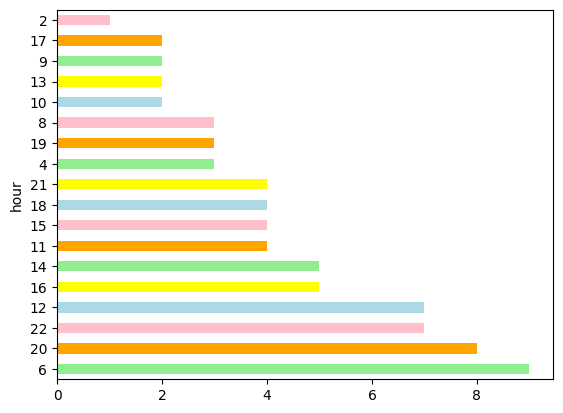

In [42]:
short_news_bomb_df.value_counts('hour').plot(kind='barh', color=['lightgreen', 'orange', 'pink', 'lightblue', 'yellow'])

<Axes: xlabel='day'>

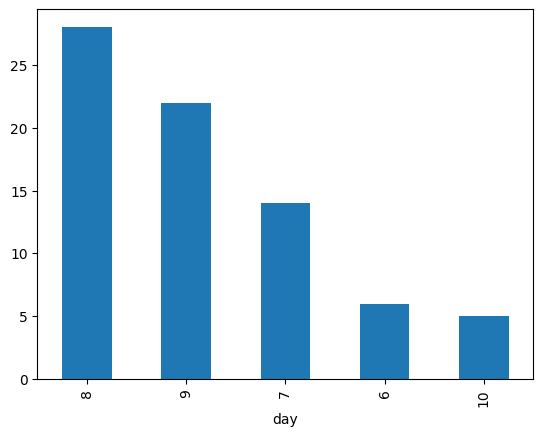

In [45]:
short_news_bomb_df.value_counts('day').plot(kind='bar')

In [47]:
from wordcloud import WordCloud, STOPWORDS

In [57]:
newsbomb=short_news_bomb_df[short_news_bomb_df['day']==8]['full_text']

In [59]:
full_text

'Newsbomb ΣΥΡΙΖΑ: Ενώ υπάρχουν 4 ασθενοφόρα στο Γενικό Νοσοκομείο της Κω , δεν υπάρχει προσωπικό για να λειτουργήσουν Με εντολή του προέδρου του ΣΥΡΙΖΑ-ΠΣ, Αλέξη Τσίπρα, βρέθηκαν στην Κω τα μέλη της Εκλογικής Επιτροπής, Ευάγγελος Αποστολάκης, Στέφανος Κασσελάκης και Αθηνά Λινού, μετά την απώλεια της ζωής μίας 63χρονης γυναίκας στην καρότσα ενός φορτηγού, κατά την μεταφορά της στο νοσοκομείο, ελλείψει ασθενοφόρου. Τα μέλη της Εκλογικής Επιτροπής επισκέφθηκαν το Γενικό Νοσοκομείο της Κω και συναντήθηκαν με τη διοίκηση και το προσωπικό, όπου και άκουσαν τα τεράστια προβλήματα υποστελέχωσης που αντιμετωπίζει το νοσοκομείο. Συγκεκριμένα, ενώ υπάρχουν 4 ασθενοφόρα, δεν υπάρχει προσωπικό για να λειτουργήσουν. Για τρεις οργανικές θέσεις καρδιολόγου στο νοσοκομείο του νησιού υπάρχει μόνο ένας, ενώ για 4 θέσεις παθολόγου, δεν υπάρχει κανείς, με αποτέλεσμα η θέση αυτή να καλύπτεται περιστασιακά από γιατρούς που έρχονται από άλλα σημεία της Ελλάδας και οι οποίοι μένουν στο νησί για μικρό διάστημα.

In [60]:
full_text = short_news_bomb_df[short_news_bomb_df['day']==8]['full_text'].str.cat(sep = ' ')

In [61]:
list(STOPWORDS)[0:20]

["it's",
 'since',
 "you'll",
 'yourself',
 'their',
 'theirs',
 'at',
 "we'll",
 'herself',
 'through',
 "can't",
 'with',
 'are',
 "weren't",
 'out',
 "he's",
 'you',
 'our',
 "what's",
 "hasn't"]

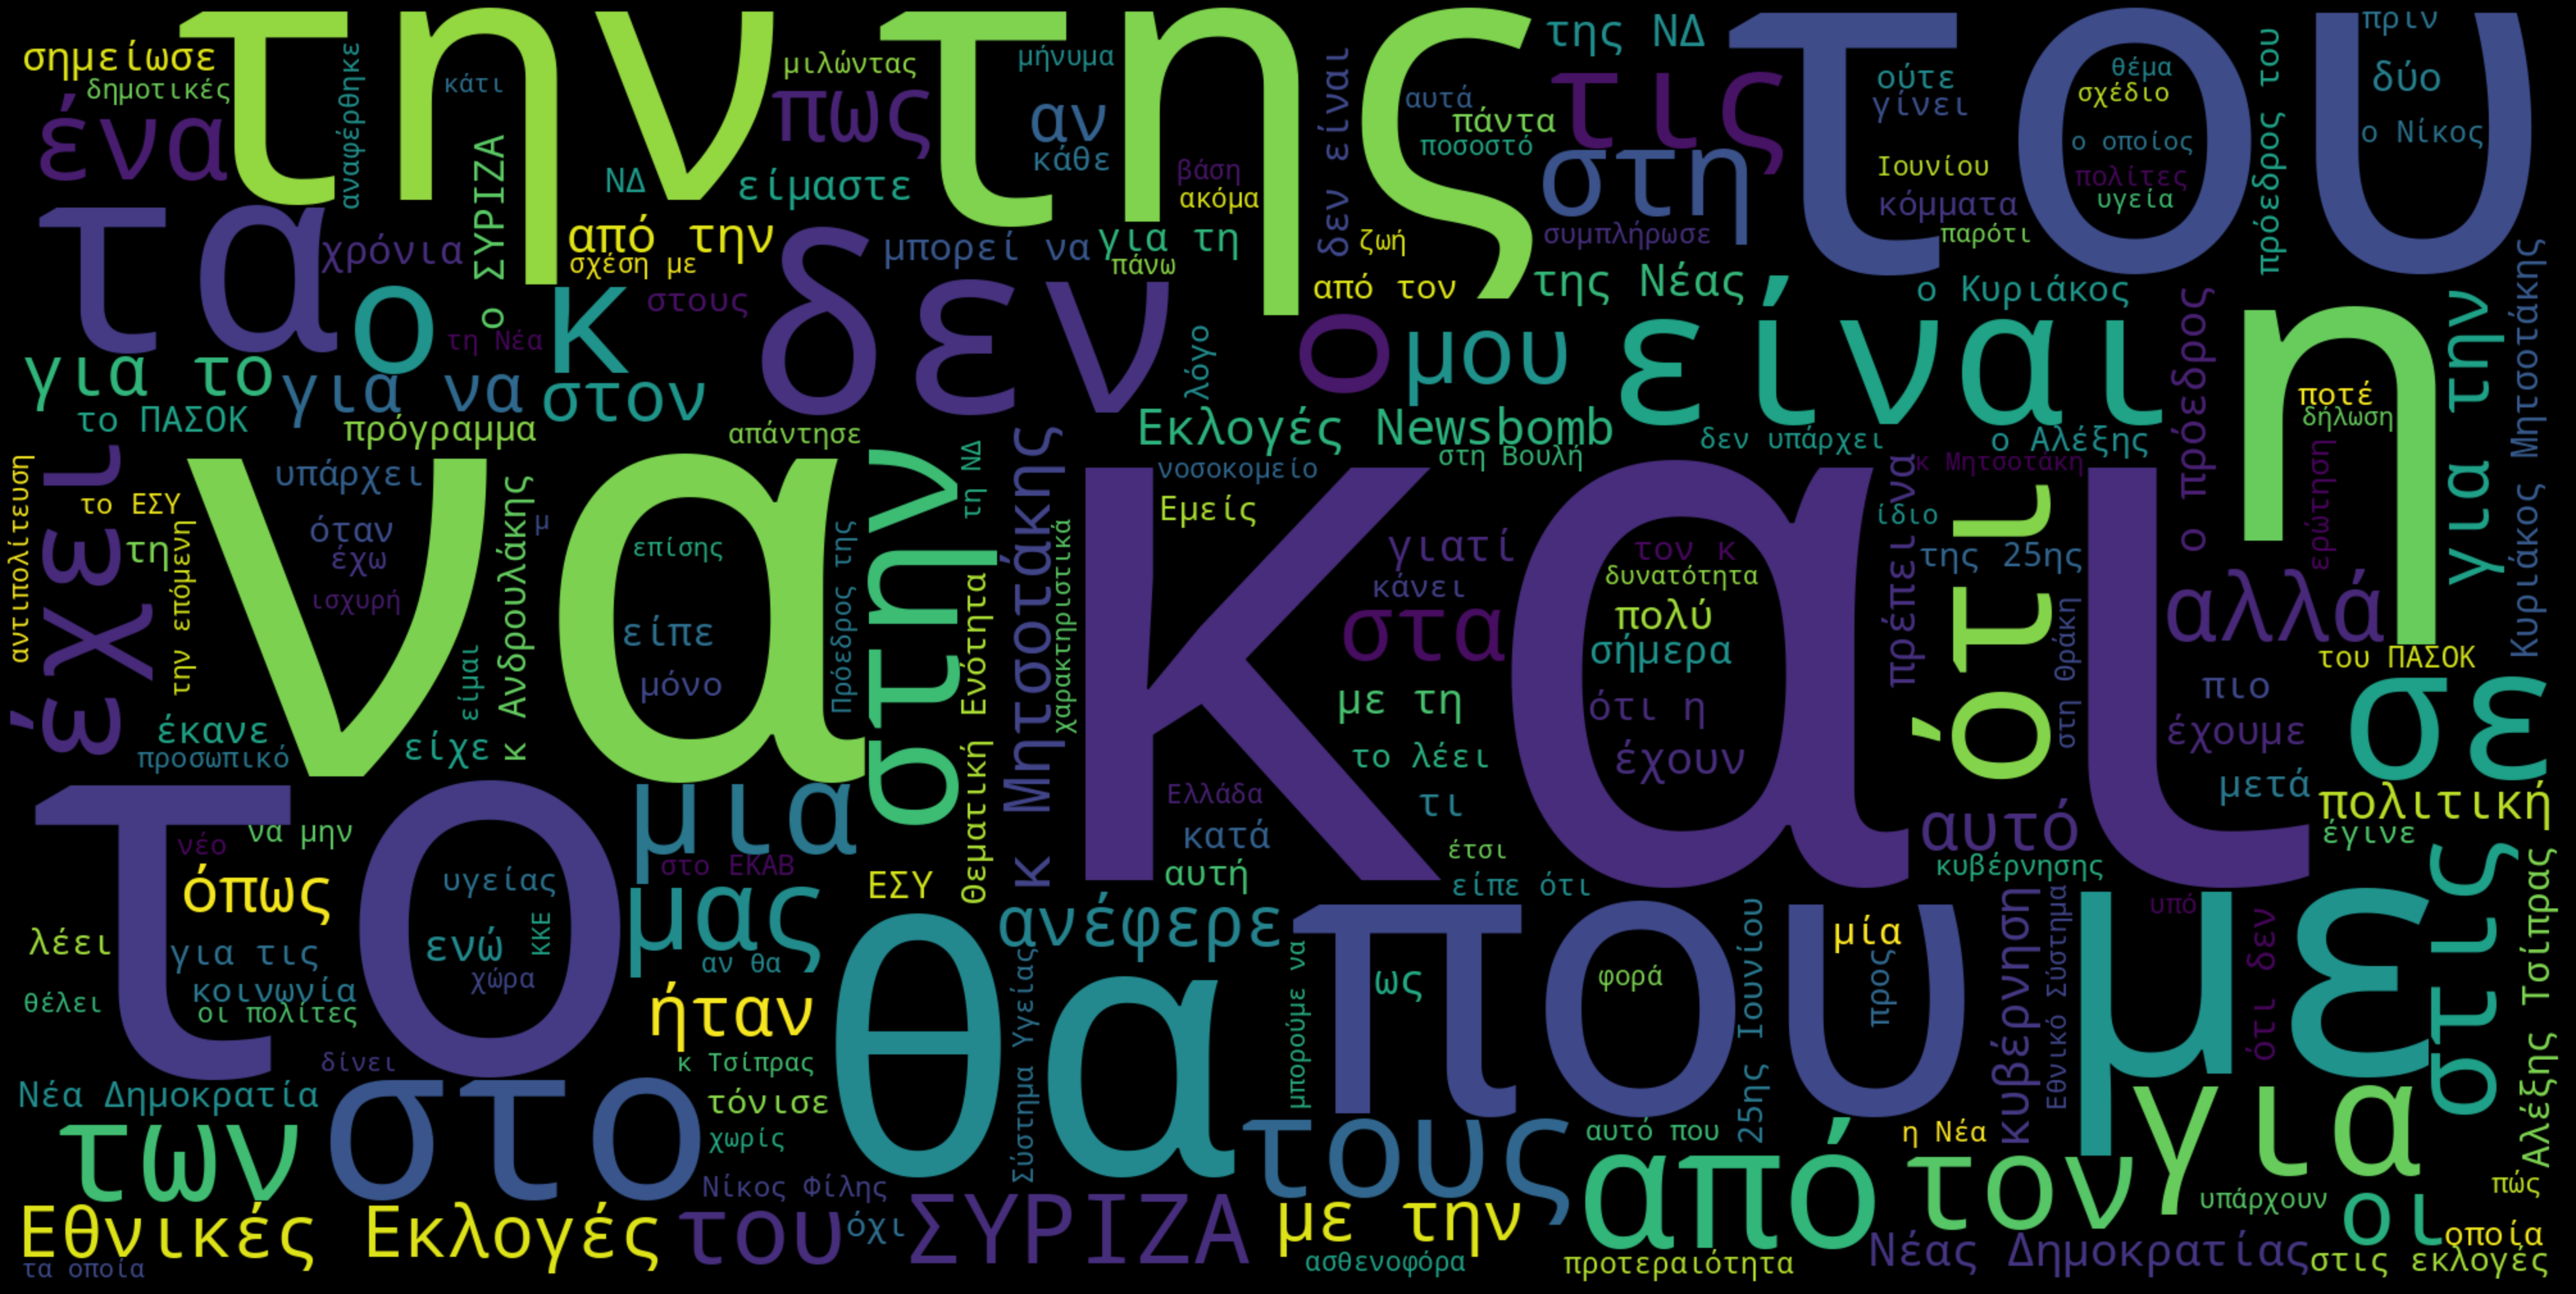

In [63]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(full_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [64]:
import spacy

In [65]:
!python -m spacy download el_core_news_sm

2023-06-10 17:14:48.050638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 82.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [66]:
nlp = spacy.load('el_core_news_sm')

In [67]:
list(nlp.Defaults.stop_words)[0:20]

['οσουσδήποτε',
 'παντού',
 'ολόγυρα',
 'μπορεί',
 'μολονότι',
 'έκανε',
 'οποίους',
 'κάνεν',
 'μεν',
 'μακάρι',
 'έχεις',
 'μάλιστα',
 'μόνης',
 'τούς',
 'ολωσδιόλου',
 'εκείνου',
 'μερικοί',
 'ταύτες',
 'οποίας',
 'ταύτην']

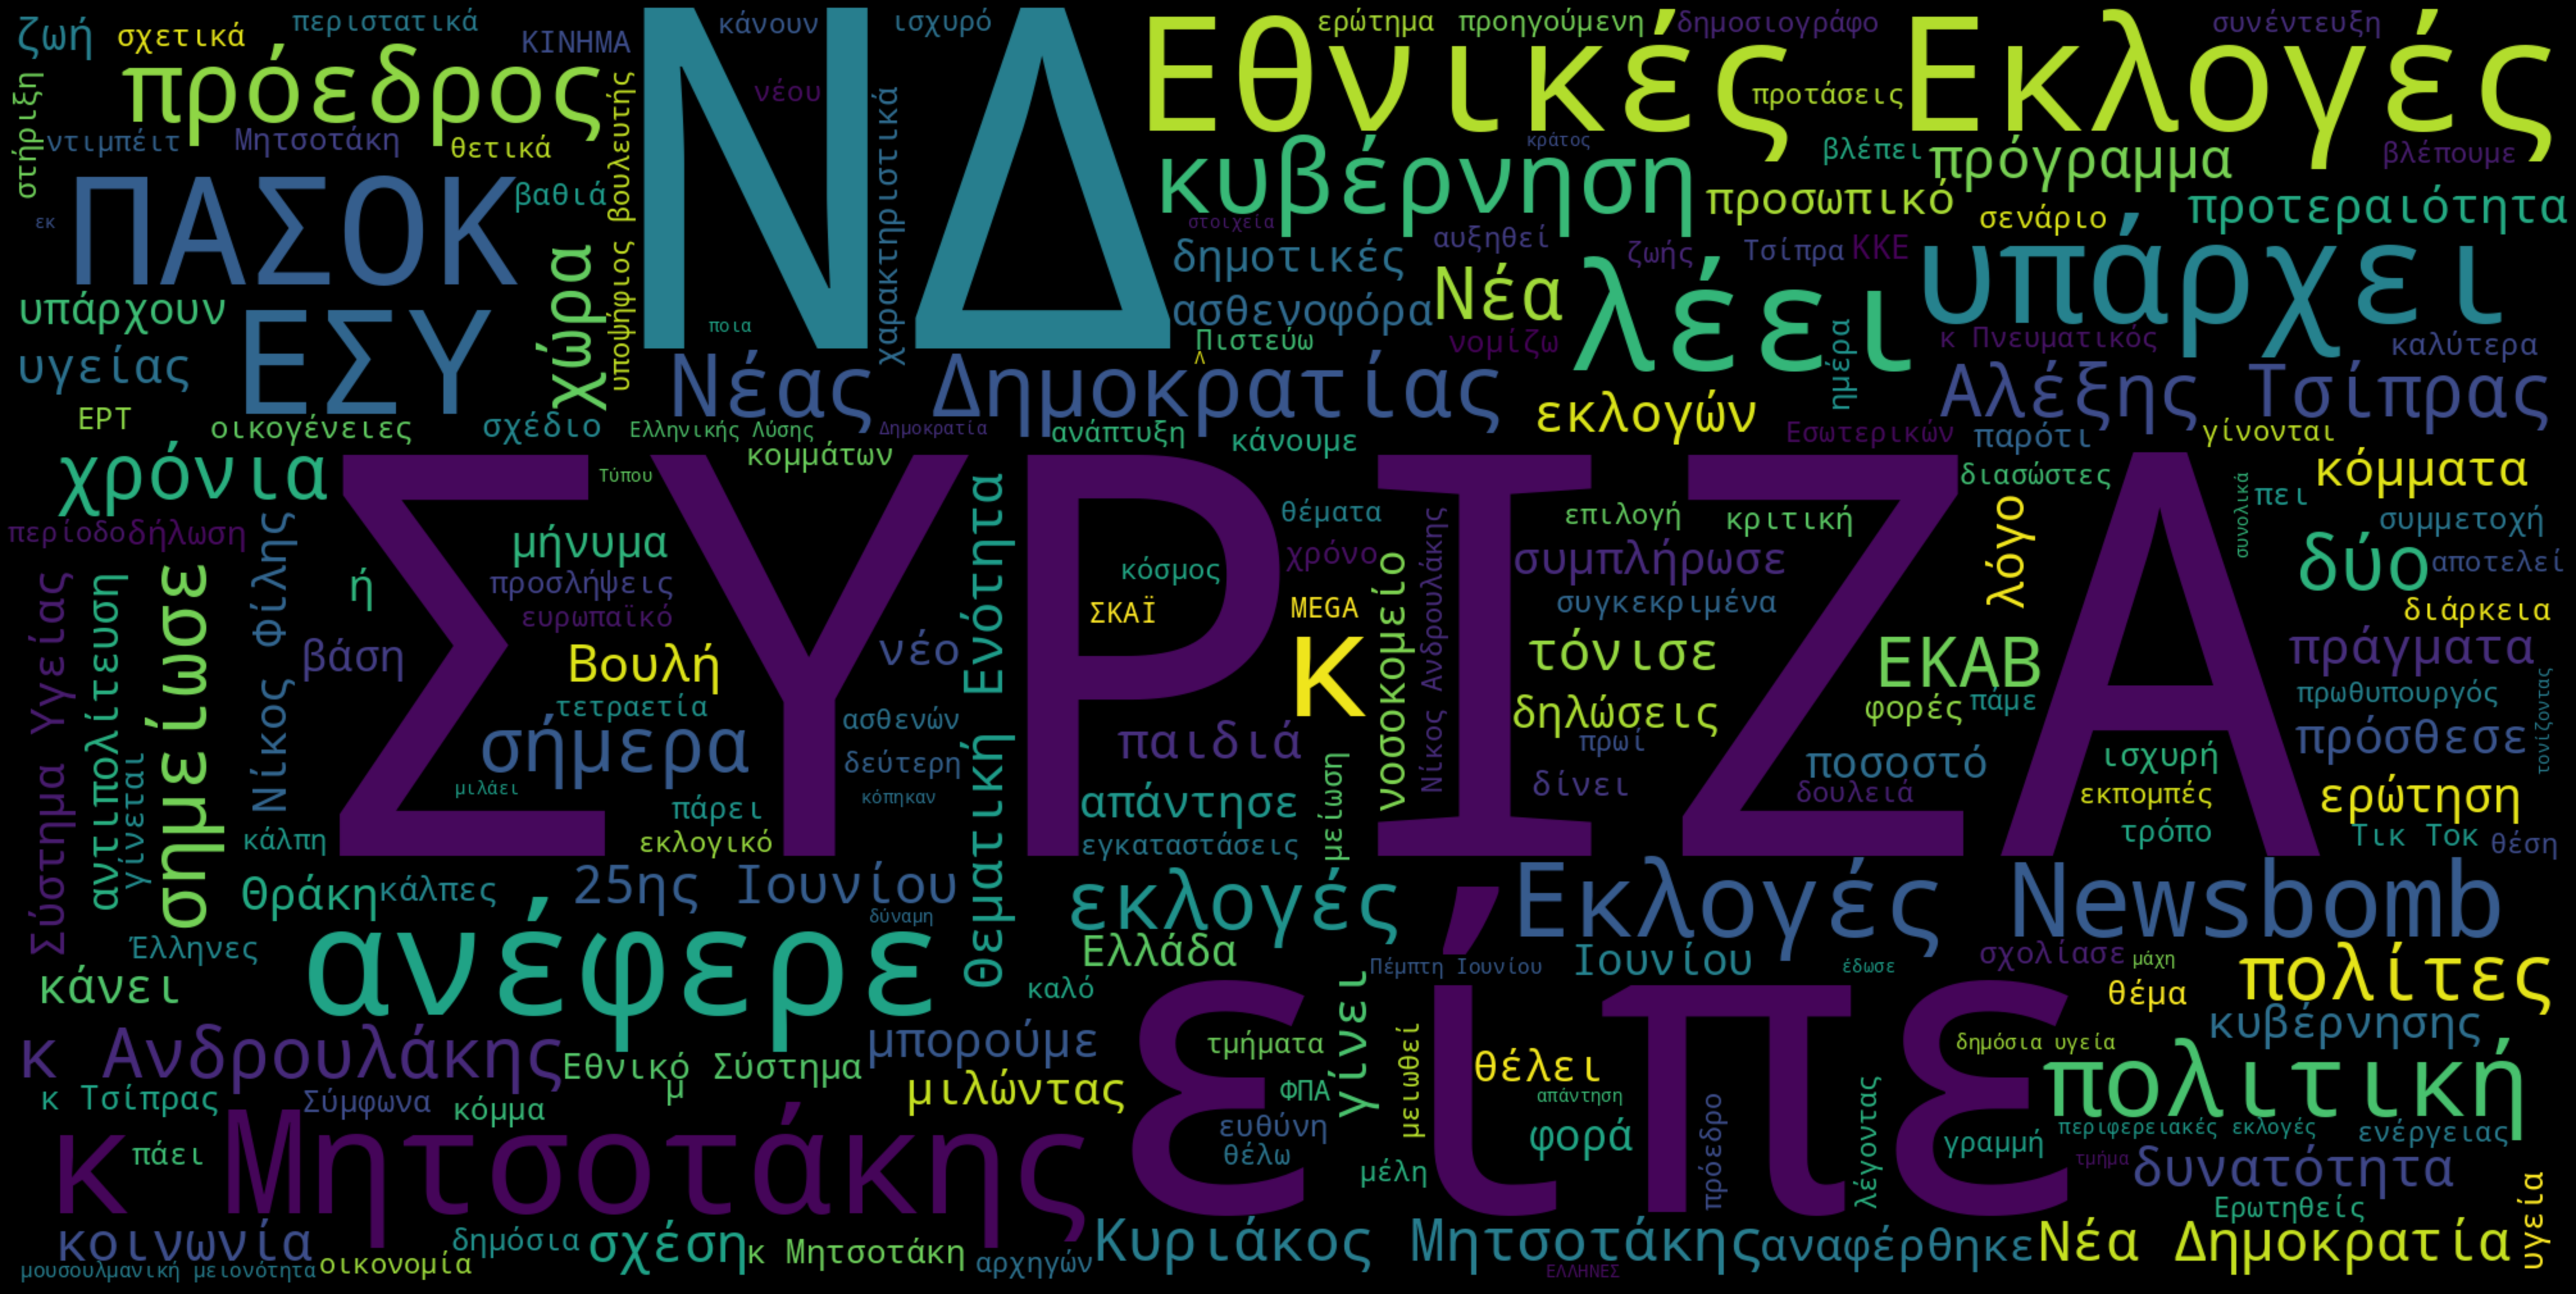

In [68]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(full_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [69]:
newsbomb=short_news_bomb_df[short_news_bomb_df['day']==9]['full_text']

In [70]:
full_text

'Newsbomb Με αφορμή τη συνέντευξη του Αλέξη Τσίπρα στον ΣΚΑΪ ο Έπροσωπος Τύπου της Νέας Δημοκρατίας Άκης Σκέρτσος προχώρησε σε δηλώσεις H Δήλωση του Εκπροσώπου Τύπου της Νέας Δημοκρατίας Άκη Σκέρτσου: Ο κ. Τσίπρας απόψε στον ΣΚΑΪ μιλώντας για τη νάρκη της απλής αναλογικής που εξουδετέρωσαν οι πολίτες, αναγνώρισε ένα μόνο από τα πολλά mea culpa που οφείλει στην ελληνική κοινωνία. Αν είχε συνειδητοποιήσει το μέγεθος των ευθυνών και των τεράστιων λαθών του που θέτουν σε κίνδυνο την κοινοβουλευτική δημοκρατία και την εθνική κυριαρχία, θα είχε πει τουλάχιστον 2 mea culpa ακόμη. Το πρώτο, για τη σιωπηρή στήριξη που παρείχε στο μόρφωμα Κασιδιάρη ψαρεύοντας από τα θολά νερά της αντισυστημικής ψήφου. Ευτυχώς το μέτωπο ευθύνης που όρθωσε η Νέα Δημοκρατία με την έγκαιρη παρέμβασή της, έβαλε φρένο για δεύτερη φορά σήμερα στην είσοδο Κασιδιάρη στη Βουλή. Το δεύτερο, για τις επιλογές του στη Ροδόπη και την Ξάνθη που ευθυγραμμίζονται με την πιο ακραία ανθελληνική προπαγάνδα. Ο κ. Τσίπρας, ενώ γνωρίζε

In [71]:
full_text = short_news_bomb_df[short_news_bomb_df['day']==9]['full_text'].str.cat(sep = ' ')

In [72]:
list(STOPWORDS)[0:20]

["it's",
 'since',
 "you'll",
 'yourself',
 'their',
 'theirs',
 'at',
 "we'll",
 'herself',
 'through',
 "can't",
 'with',
 'are',
 "weren't",
 'out',
 "he's",
 'you',
 'our',
 "what's",
 "hasn't"]

In [73]:
list(nlp.Defaults.stop_words)[0:20]

['οσουσδήποτε',
 'παντού',
 'ολόγυρα',
 'μπορεί',
 'μολονότι',
 'έκανε',
 'οποίους',
 'κάνεν',
 'μεν',
 'μακάρι',
 'έχεις',
 'μάλιστα',
 'μόνης',
 'τούς',
 'ολωσδιόλου',
 'εκείνου',
 'μερικοί',
 'ταύτες',
 'οποίας',
 'ταύτην']

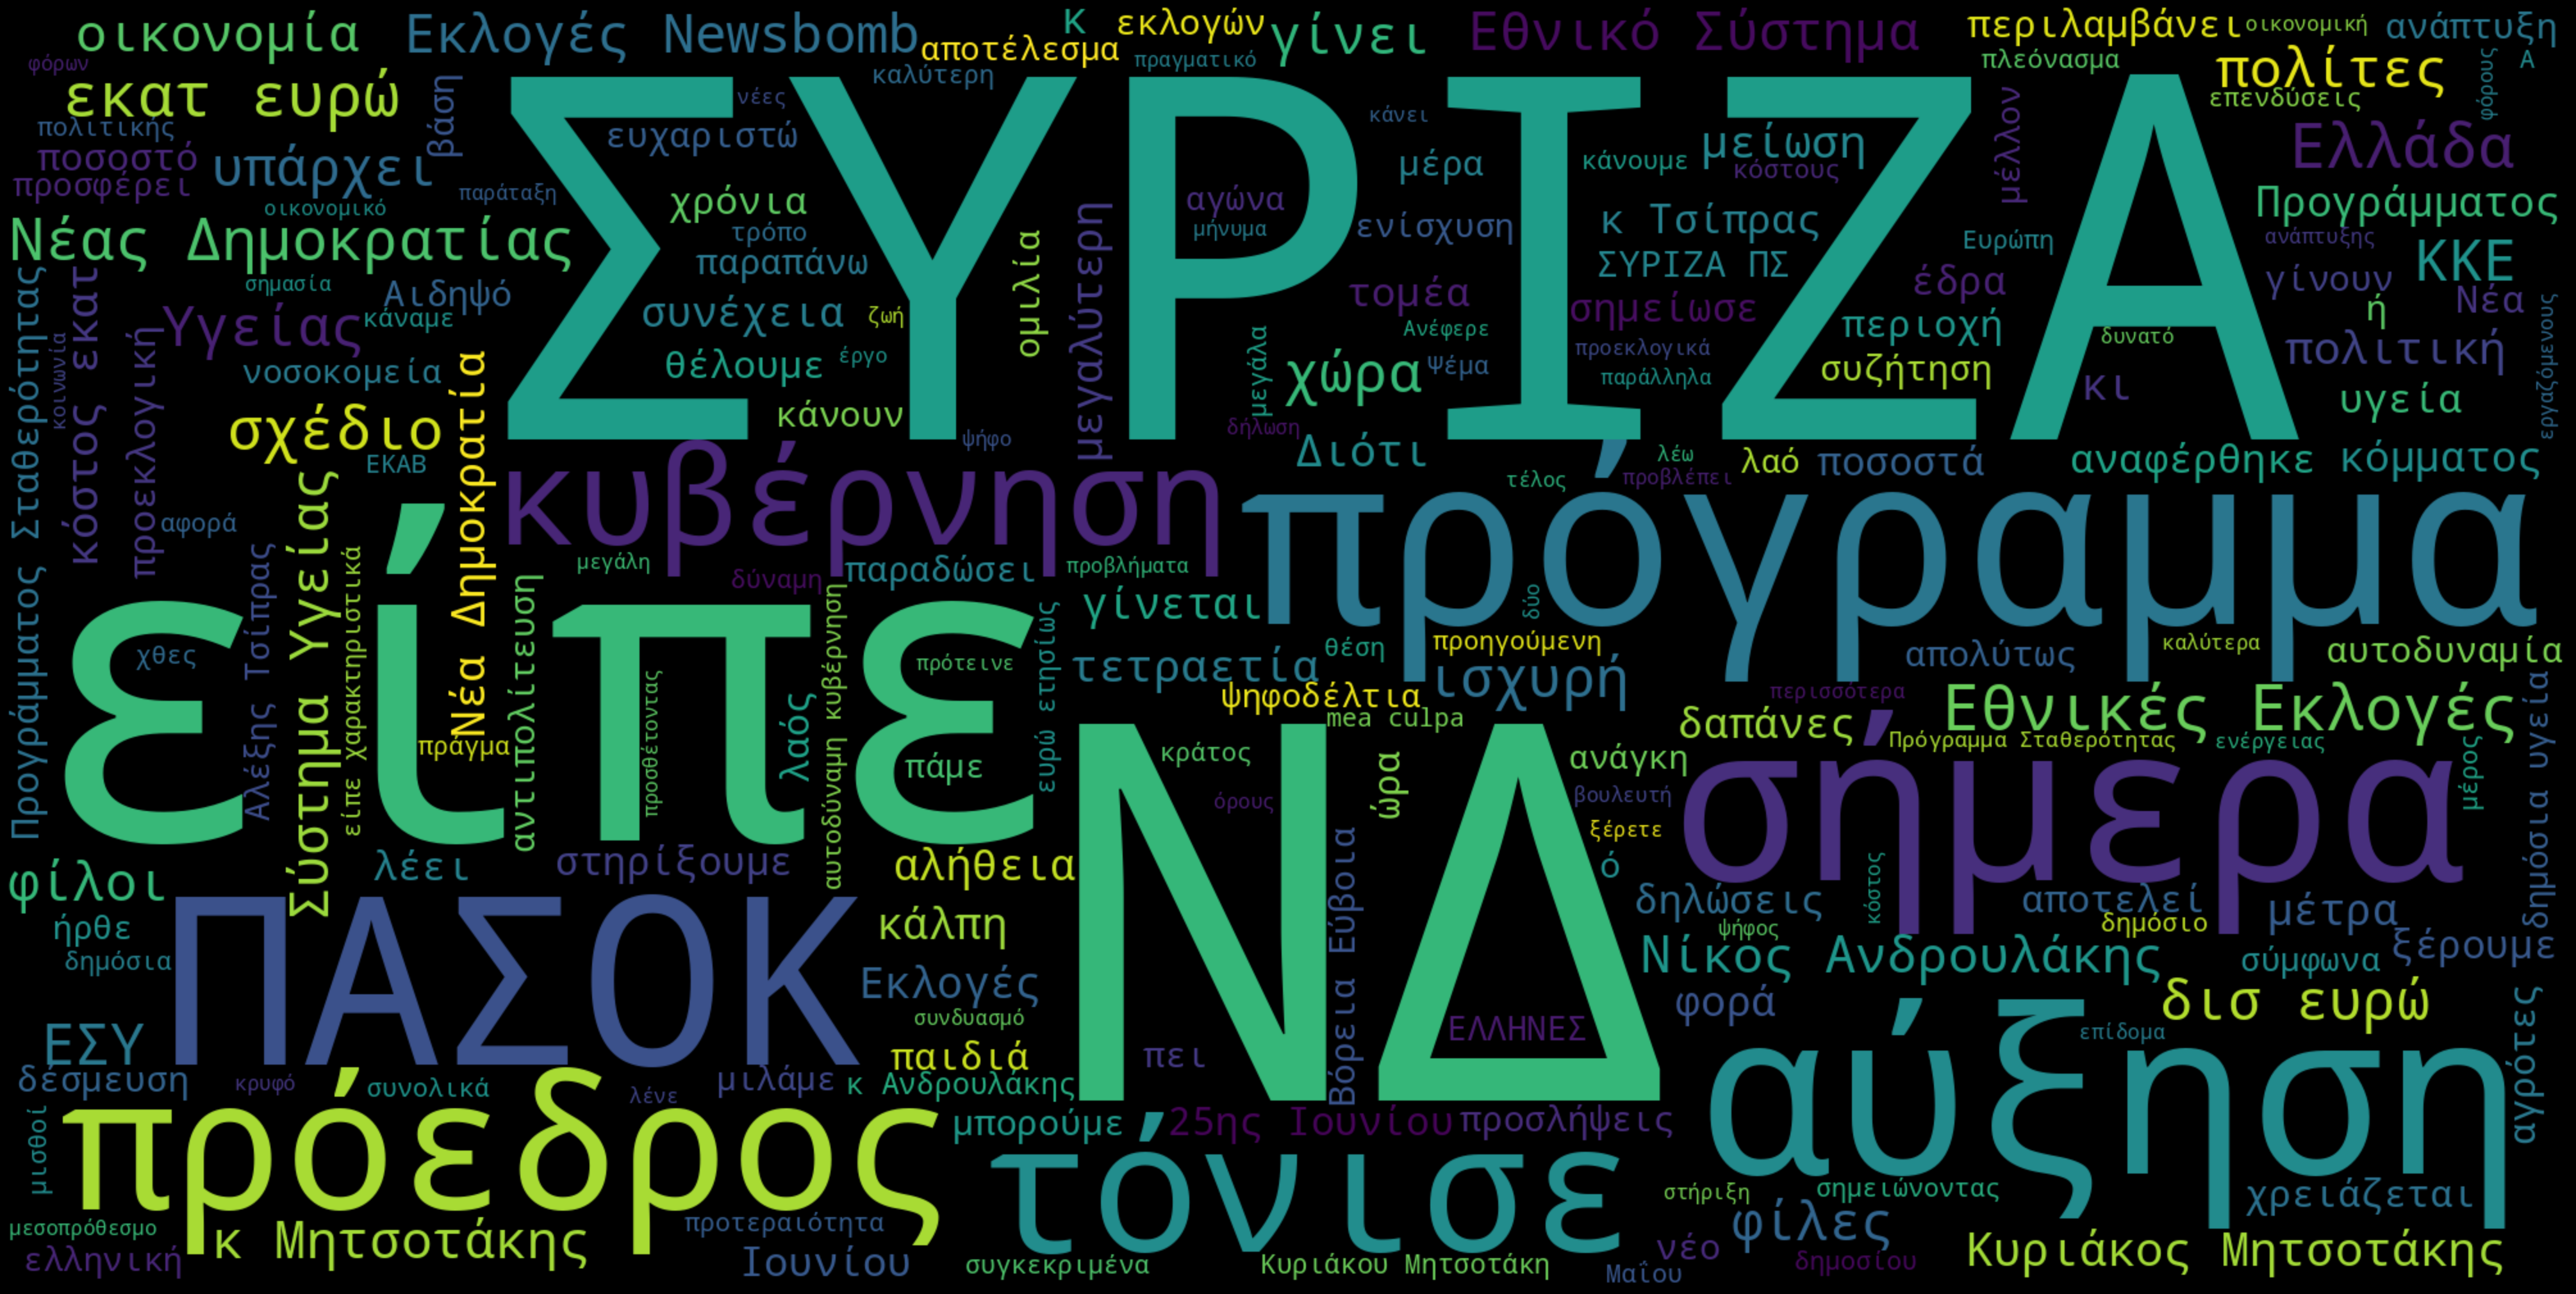

In [74]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(full_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()